In [34]:
import numpy as np
import pandas as pd
import yfinance as yf

In [35]:
nifty = yf.Ticker('^NSEI')
nifty_data = nifty.history(period = 'max')

nifty_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0


In [36]:
print(nifty_data.shape)

(4505, 7)


In [37]:
df = nifty_data
# dates = df.index

# cur_dated = []
# for d in dates:
#     cur_dated.append(str(d)[:10])

# cur_dated = pd.Series(cur_dated)
# df.index = cur_dated
# df.head()

df.index = df.index.strftime('%Y-%m-%d')

<Axes: xlabel='Date'>

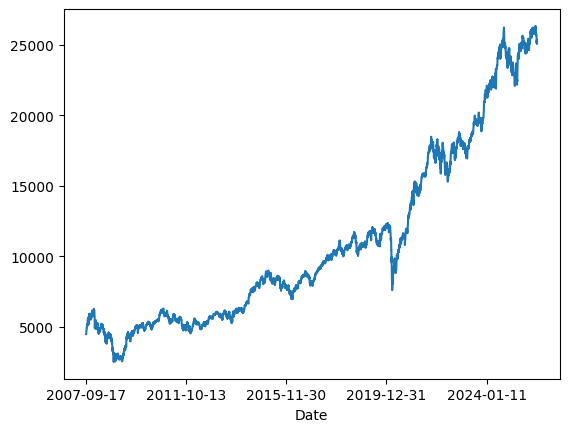

In [38]:
nifty_data['Close'].plot(kind = 'line')

<Axes: xlabel='Date'>

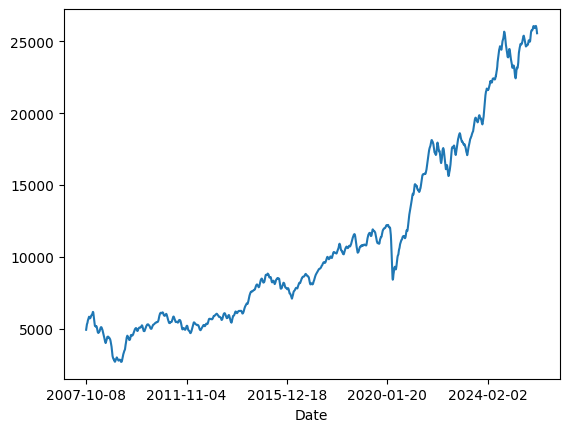

In [39]:
df['Close'].rolling(window = 15).mean().dropna().plot(kind = 'line')

## Seasonality

In [40]:
df['date'] = pd.to_datetime(df.index)

In [41]:
df['month'] = df['date'].dt.strftime('%Y-%m')
df.index = df['date'].dt.strftime('%Y-%m')

In [42]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,month
date,,,,,,,,,
2007-09,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0,2007-09-17,2007-09
2007-09,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0,2007-09-18,2007-09
2007-09,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0,2007-09-19,2007-09
2007-09,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0,2007-09-20,2007-09
2007-09,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0,2007-09-21,2007-09


<Axes: xlabel='month'>

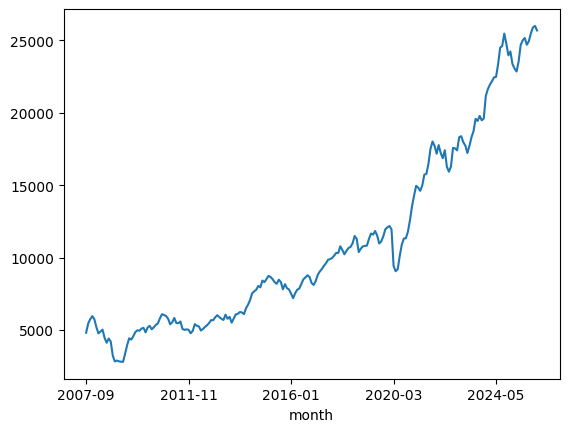

In [43]:
df['Close'].groupby(df['month']).agg('mean').plot()

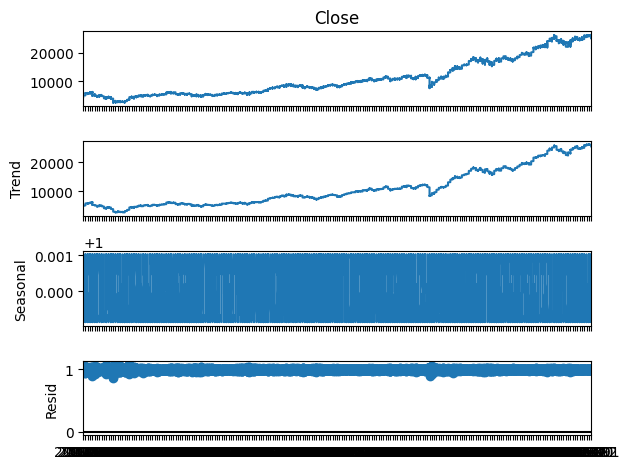

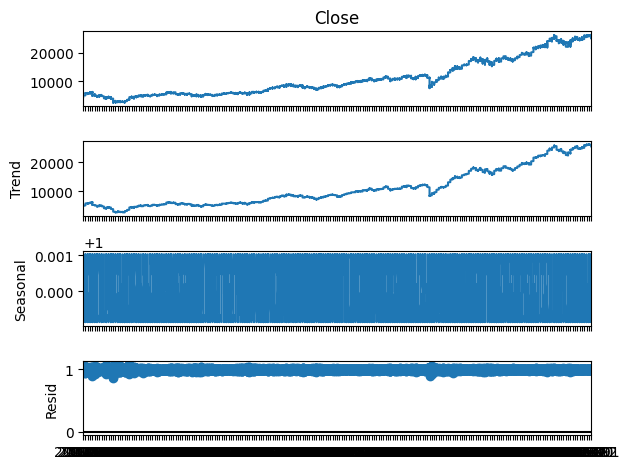

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df['Close'], 'multiplicative', period = 12)
res.plot()

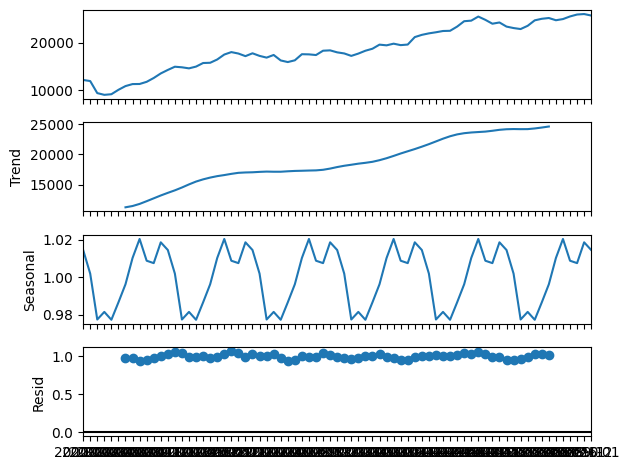

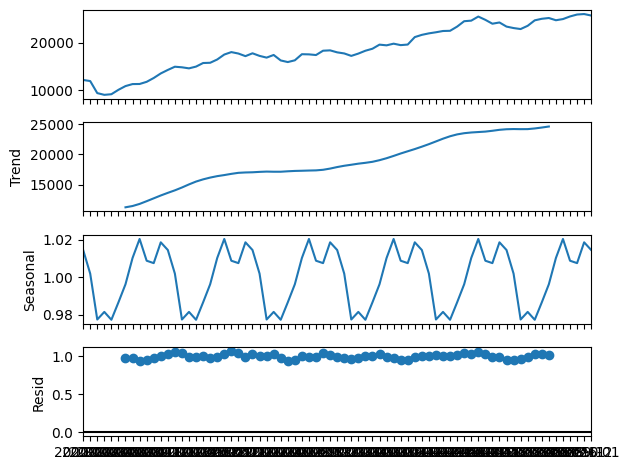

In [45]:
df_plot = pd.DataFrame(df['Close'].groupby(df['month']).agg('mean'))
res = seasonal_decompose(df_plot['2020-01': ], 'multiplicative', period = 12)
res.plot()